In [1]:
!unzip -q archive.zip -d /content/data/

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
def load_covid_dataset(file_paths):
    loaded_data = {}
    for name, path in file_paths.items():
        try:
            loaded_data[name] = pd.read_csv(path)
            print(f"{name} loaded successfully with {loaded_data[name].shape[0]} rows and {loaded_data[name].shape[1]} columns.")
        except Exception as e:
            print(f"Error loading {name}: {e}")
    return loaded_data

In [8]:
files_paths = { "country_wise_latest":"/content/country_wise_latest.csv", "covid_19_clean_complete":"/content/covid_19_clean_complete.csv", "day_wise":"/content/day_wise.csv", "full_grouped":"/content/full_grouped.csv", "usa_county_wise":"/content/usa_county_wise.csv", "worldometer_data":"/content/worldometer_data.csv"}

In [9]:
dataframes = load_covid_dataset(files_paths)

country_wise_latest loaded successfully with 187 rows and 15 columns.
covid_19_clean_complete loaded successfully with 49068 rows and 10 columns.
day_wise loaded successfully with 188 rows and 12 columns.
full_grouped loaded successfully with 35156 rows and 10 columns.
usa_county_wise loaded successfully with 218429 rows and 14 columns.
worldometer_data loaded successfully with 209 rows and 16 columns.


## RENAMING OF EACH DATAFRAME

In [10]:
ctry_wise_ltst = dataframes["country_wise_latest"]
covid_19_cln_cmpt = dataframes["covid_19_clean_complete"]
day_wise = dataframes["day_wise"]
full_grp = dataframes["full_grouped"]
usa_ctry_wise = dataframes["usa_county_wise"]
world_mtr = dataframes["worldometer_data"]

In [11]:
# Display the first five rows of each dataset
print(ctry_wise_ltst.head())
print(covid_19_cln_cmpt.head())
print(day_wise.head())
print(full_grp.head())
print(usa_ctry_wise.head())
print(world_mtr.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [13]:
# Cleaning of the data: Removing duplicates and handling of missing values
datasets = {
    "ctry_wise_ltst": ctry_wise_ltst,
    "covid_19_cln_cmpt": covid_19_cln_cmpt,
    "day_wise": day_wise,
    "full_grp": full_grp,
    "usa_ctry_wise": usa_ctry_wise,
    "world_mtr": world_mtr
}

In [14]:
# Removing of duplicates and handling of missing values
for name, df in datasets.items():
    # Remove duplicates
    datasets[name] = df.drop_duplicates()
    print(f"{name}: Removed duplicates. Remaining rows: {datasets[name].shape[0]}")

    # Handling missing values by dropping rows with NaN values
    datasets[name] = df.dropna()

    # Standardize column names
    datasets[name].columns = datasets[name].columns.str.strip().str.lower().str.replace(' ', '_')
    print(f"Updated column names for {name}: {datasets[name].columns.tolist()}")

ctry_wise_ltst: Removed duplicates. Remaining rows: 187
Updated column names for ctry_wise_ltst: ['country/region', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'confirmed_last_week', '1_week_change', '1_week_%_increase', 'who_region']
covid_19_cln_cmpt: Removed duplicates. Remaining rows: 49068
Updated column names for covid_19_cln_cmpt: ['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed', 'deaths', 'recovered', 'active', 'who_region']
day_wise: Removed duplicates. Remaining rows: 188
Updated column names for day_wise: ['date', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'no._of_countries']
full_grp: Removed duplicates. Remaining rows: 35156
Updated column names for full_grp: ['date', 'country/region', 'confirmed', 'deaths', 'recove

In [15]:
# Feature Engineering: Add daily growth rate, mortality ratio, and cases per population
for name, df in datasets.items():
    if 'confirmed' in df.columns and 'deaths' in df.columns:
        # Calculate daily growth rate (percentage change in confirmed cases)
        df.loc[:, 'daily_growth_rate'] = df['confirmed'].pct_change() * 100

        # Calculate mortality ratio (deaths/confirmed cases)
        df.loc[:, 'mortality_ratio'] = df['deaths'] / df['confirmed'] * 100

        # Calculate cases per population (normalize by population)
        if 'population' in df.columns:
            df.loc[:, 'cases_per_population'] = df['confirmed'] / df['population'] * 100000
        else:
            df.loc[:, 'cases_per_population'] = np.nan  # Placeholder if population data is missing

        # Check if the columns were created
        print(f"Columns in {name}: {df.columns.tolist()}")

        # Fill NaN values for the new columns with 0 (ensure columns are created first)
        if 'daily_growth_rate' in df.columns:
            df.loc[:, 'daily_growth_rate'] = df['daily_growth_rate'].fillna(0)

        if 'mortality_ratio' in df.columns:
            df.loc[:, 'mortality_ratio'] = df['mortality_ratio'].fillna(0)

        if 'cases_per_population' in df.columns:
            df.loc[:, 'cases_per_population'] = df['cases_per_population'].fillna(0)

        print(f"Enriched {name} with new features.")

Columns in ctry_wise_ltst: ['country/region', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'confirmed_last_week', '1_week_change', '1_week_%_increase', 'who_region', 'daily_growth_rate', 'mortality_ratio', 'cases_per_population']
Enriched ctry_wise_ltst with new features.
Columns in covid_19_cln_cmpt: ['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed', 'deaths', 'recovered', 'active', 'who_region', 'daily_growth_rate', 'mortality_ratio', 'cases_per_population']
Enriched covid_19_cln_cmpt with new features.
Columns in day_wise: ['date', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'no._of_countries', 'daily_growth_rate', 'mortality_ratio', 'cases_per_population']
Enriched day_wise with new features.
Columns in full_grp: ['date', 'coun

<ipython-input-15-b4c2111d8a44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'daily_growth_rate'] = df['confirmed'].pct_change() * 100
<ipython-input-15-b4c2111d8a44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mortality_ratio'] = df['deaths'] / df['confirmed'] * 100
<ipython-input-15-b4c2111d8a44>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

<Figure size 1200x600 with 0 Axes>

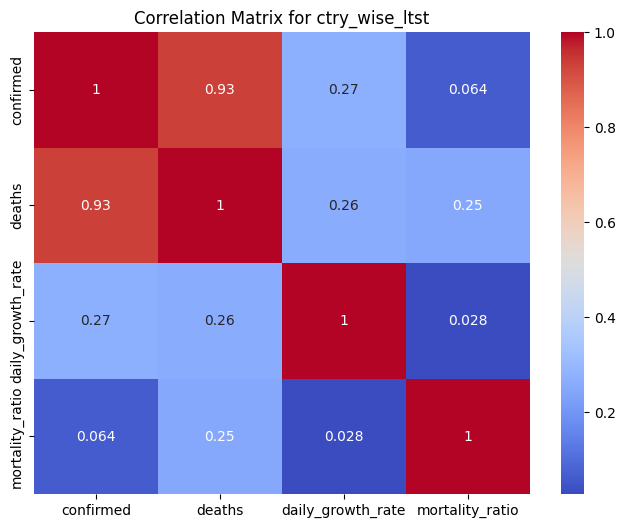

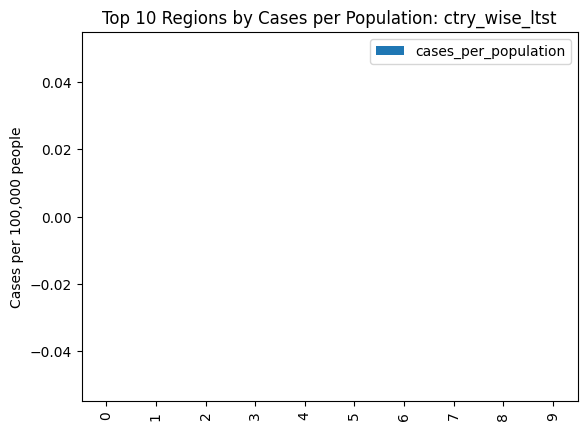

<ipython-input-16-a208427e58de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT if parsing fails
<ipython-input-16-a208427e58de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates


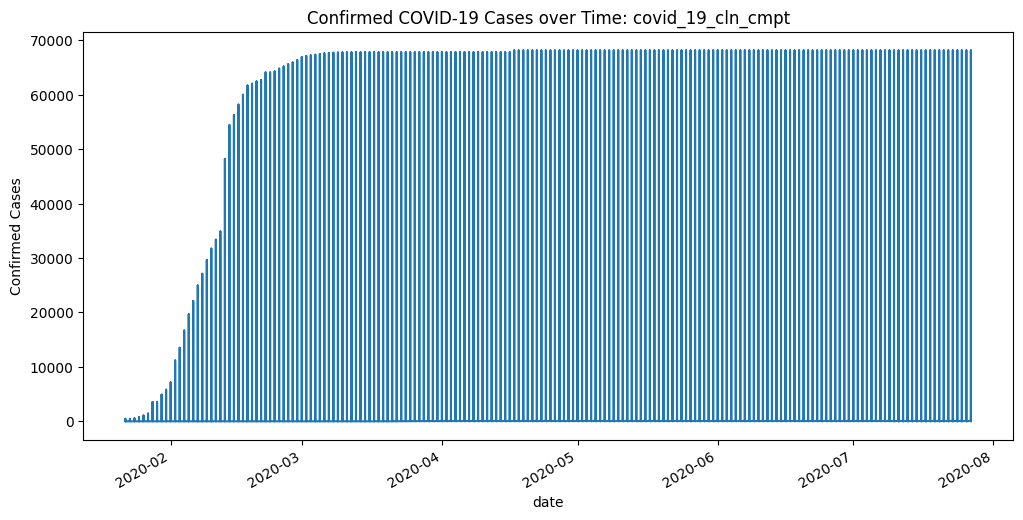

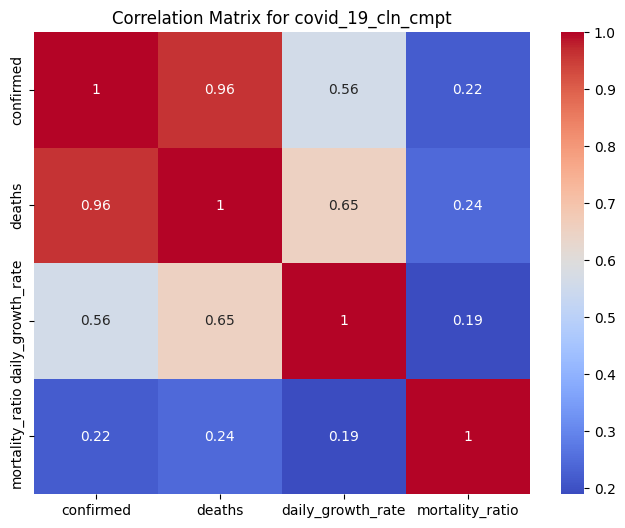

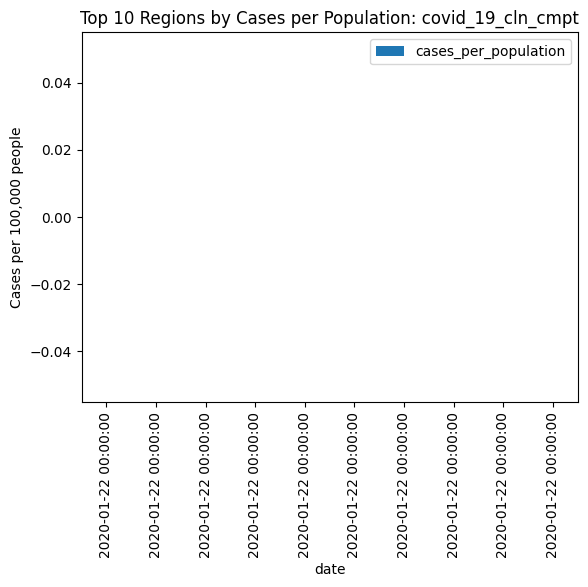

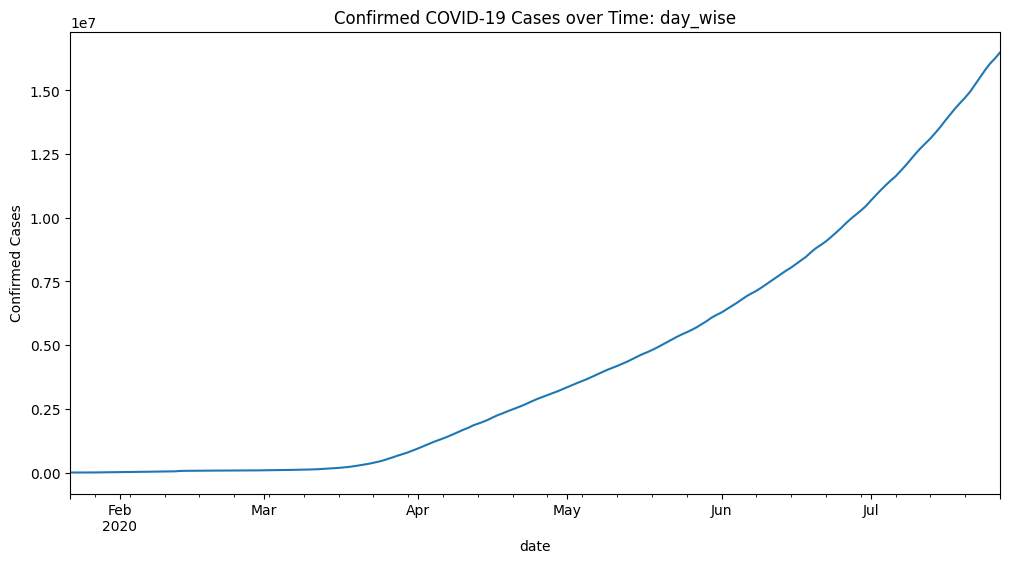

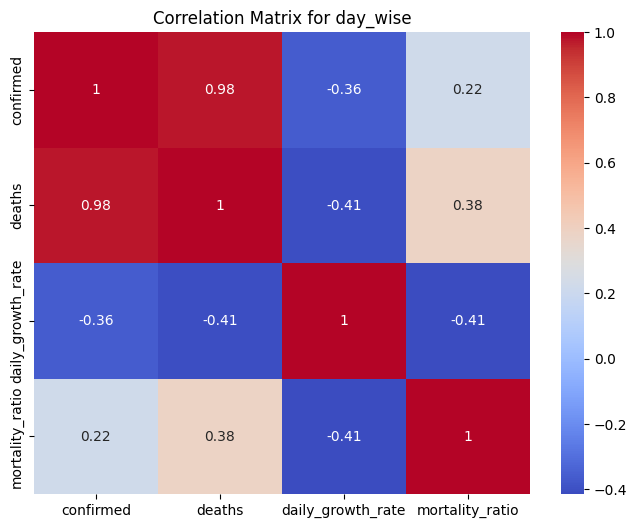

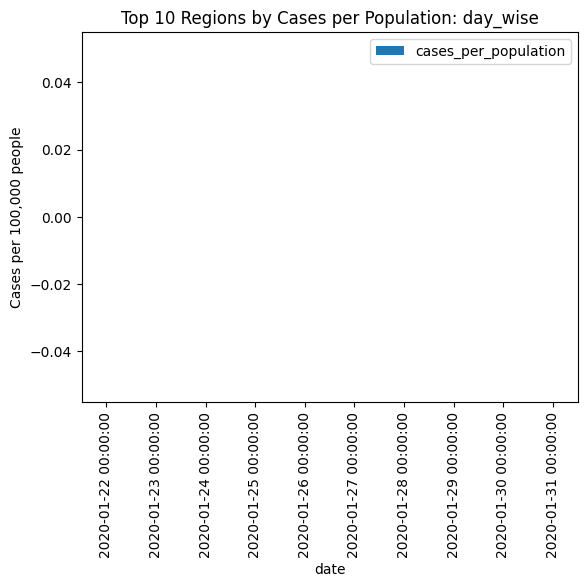

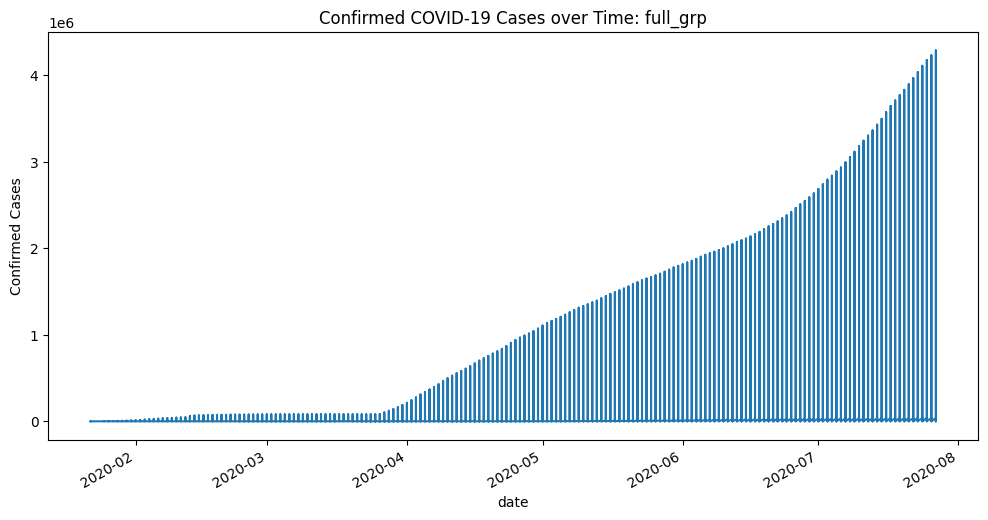

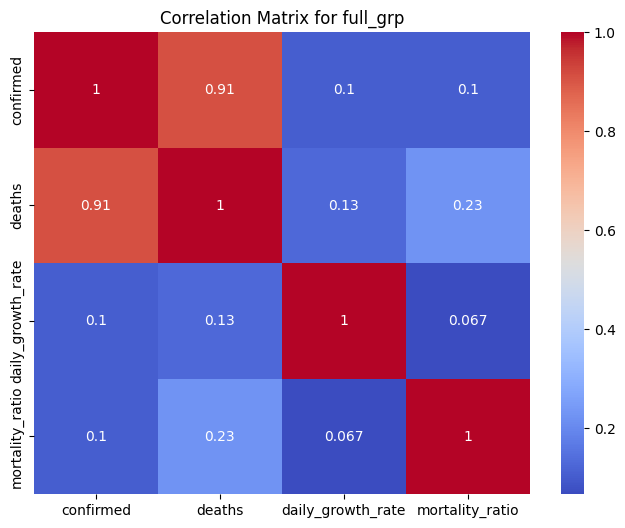

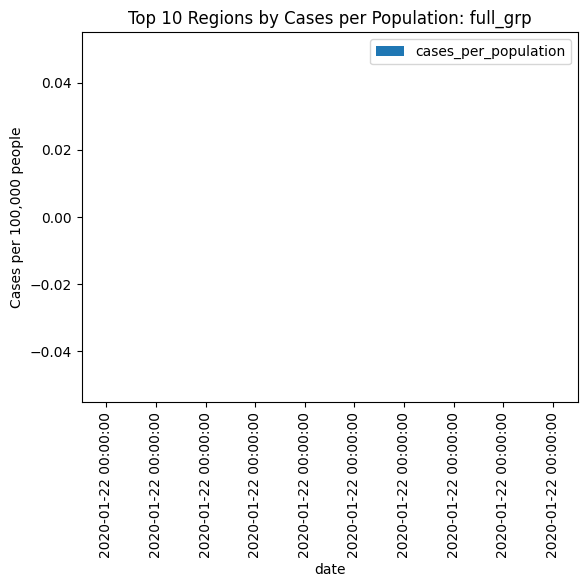

<ipython-input-16-a208427e58de>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT if parsing fails
<ipython-input-16-a208427e58de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT if parsing fails
<ipython-input-16-a208427e58de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

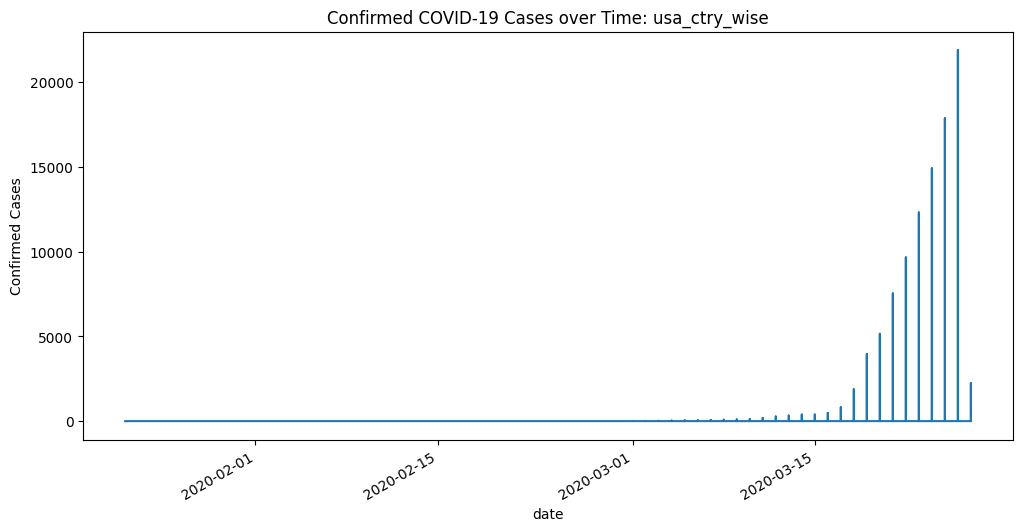

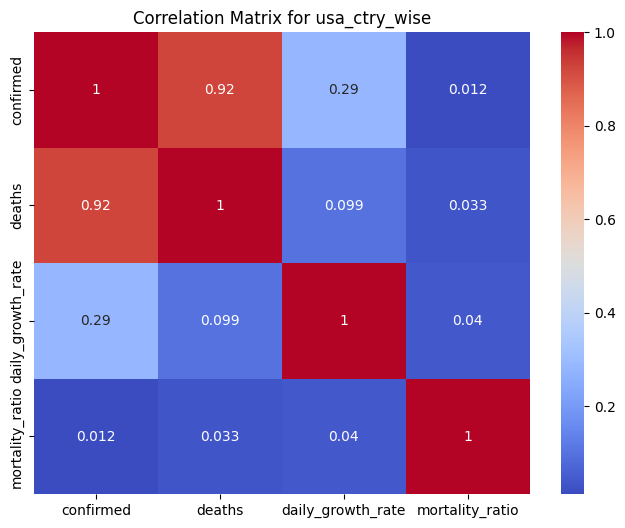

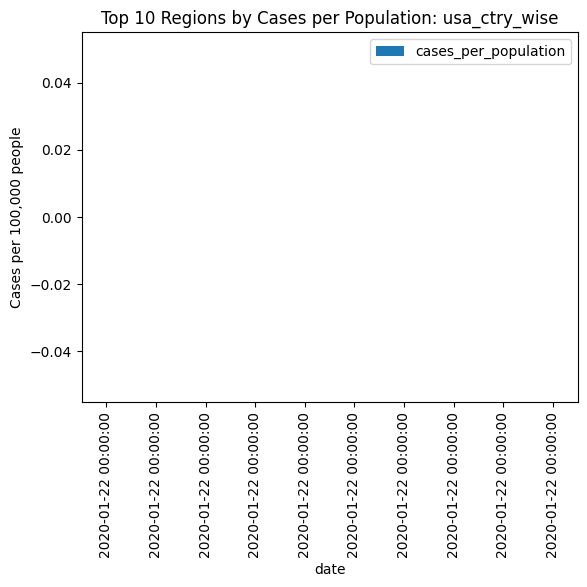

<Figure size 1200x600 with 0 Axes>

In [16]:
# Exploratory Data Analysis (EDA): Visualizations and correlation analysis
for name, df in datasets.items():
    plt.figure(figsize=(12, 6))

    # Line plot for confirmed cases over time
    if 'date' in df.columns and 'confirmed' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT if parsing fails
        df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates

        # Set date as the index
        df.set_index('date', inplace=True)

        # Plot the confirmed cases
        df['confirmed'].plot(title=f"Confirmed COVID-19 Cases over Time: {name}")
        plt.ylabel('Confirmed Cases')
        plt.show()

    # Correlation matrix for key metrics
    if 'confirmed' in df.columns and 'deaths' in df.columns:
        correlation = df[['confirmed', 'deaths', 'daily_growth_rate', 'mortality_ratio']].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm')
        plt.title(f"Correlation Matrix for {name}")
        plt.show()

    # Bar plot for cases per population
    if 'cases_per_population' in df.columns:
        df[['cases_per_population']].head(10).plot(kind='bar', title=f"Top 10 Regions by Cases per Population: {name}")
        plt.ylabel('Cases per 100,000 people')
        plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Time-Series Forecasting for 'worldometer_data' (or any other dataset with time-series data)
df = datasets['world_mtr']
if 'date' in df.columns and 'confirmed' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce errors to NaT if parsing fails
    df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates

    # Set 'date' as index
    df.set_index('date', inplace=True)

    # Fit ARIMA model to forecast confirmed cases
    model = ARIMA(df['confirmed'], order=(5,1,0))  # (p,d,q) parameters
    model_fit = model.fit()

    # Forecast next 30 days
    forecast = model_fit.forecast(steps=30)

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['confirmed'], label='Actual Cases')
    plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecasted Cases', color='red')
    plt.title("ARIMA Forecast for COVID-19 Cases")
    plt.legend()
    plt.show()

    # Model evaluation using RMSE (Root Mean Squared Error)
    rmse = math.sqrt(mean_squared_error(df['confirmed'][-30:], forecast))
    print(f"RMSE for the forecast: {rmse}")

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Example: If you have data in a CSV file, you can load it as follows
# df = pd.read_csv("path_to_your_data.csv")  # Uncomment and provide path if needed

# For demonstration, I'll create a small sample DataFrame
data = {
    'daily_growth_rate': np.random.rand(5000),
    'cases_per_population': np.random.rand(5000),
    'mortality_ratio': np.random.rand(5000),
    'high_risk': np.random.choice([0, 1], size=5000)
}

df = pd.DataFrame(data)

# Selecting relevant columns
df = df[['daily_growth_rate', 'cases_per_population', 'mortality_ratio', 'high_risk']]

# Drop rows with NaN values
df = df.dropna()

# Select a random sample of 1000 rows
df_sampled = df.sample(n=1000, random_state=42)

# Define features and target
X = df_sampled[['daily_growth_rate', 'cases_per_population', 'mortality_ratio']]
y = df_sampled['high_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       100
           1       0.52      0.58      0.55       100

    accuracy                           0.53       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200

Accuracy Score: 0.525


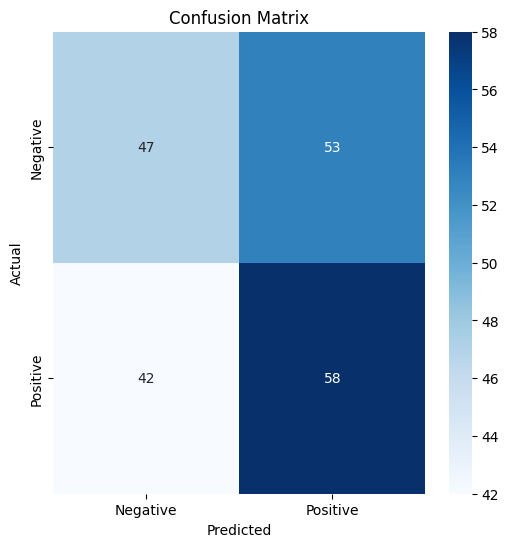

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

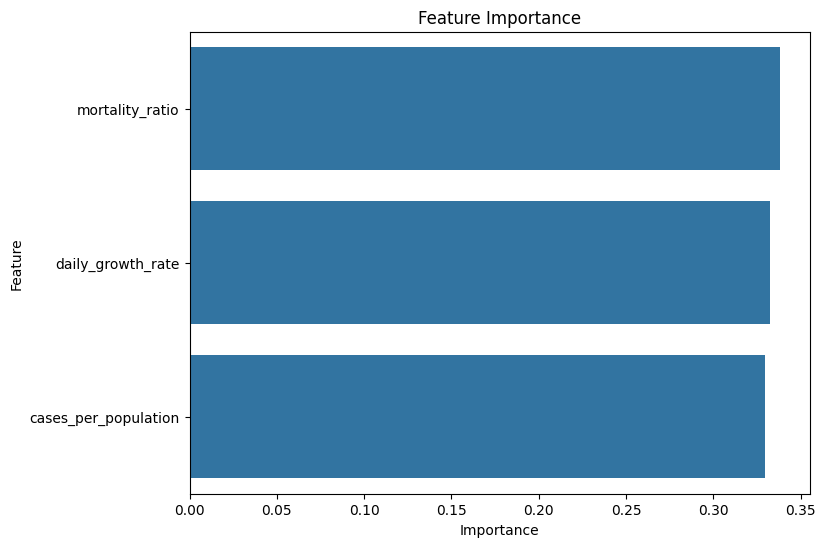

In [21]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

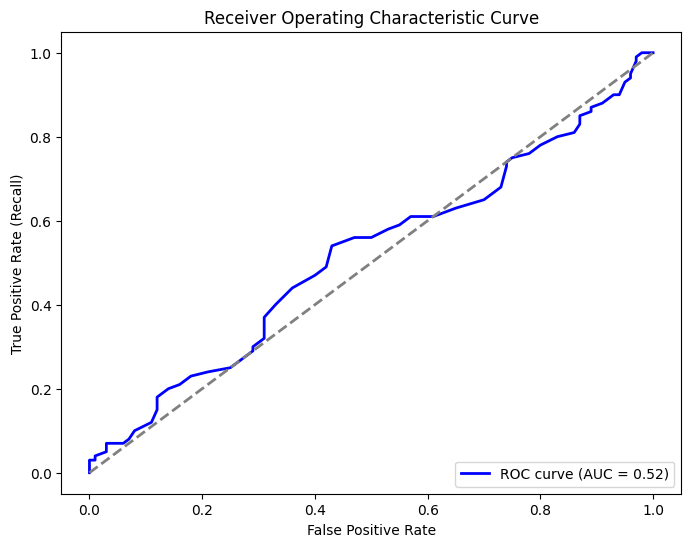

In [22]:
from sklearn.metrics import roc_curve, auc

# Get false (-ve) rate, true (+ve) rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()